Sample some 2d data from a Dirichlet process mixture of Gaussians.

In [1]:
try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml

In [2]:
# Silence WARNING:root:The use of `check_types` is deprecated and does not have any effect.
# https://github.com/tensorflow/probability/issues/1523
import logging

logger = logging.getLogger()


class CheckTypesFilter(logging.Filter):
    def filter(self, record):
        return "check_types" not in record.getMessage()


logger.addFilter(CheckTypesFilter())

In [3]:
from probml_utils.dp_mixgauss_utils import dp_mixgauss_sample, NormalInverseWishart

In [4]:
import jax.numpy as jnp
from jax import random, vmap
from scipy.linalg import sqrtm
import matplotlib.pyplot as plt

In [5]:
# Example
dim = 2
# Set the hyperparameter for the NIW distribution
hyper_params = dict(loc=jnp.zeros(dim), mean_precision=0.05, df=dim + 5, scale=jnp.eye(dim))
# Generate the NIW object
dp_base_measure = NormalInverseWishart(**hyper_params)
key = random.PRNGKey(0)
num_of_samples = 1000
dp_concentrations = jnp.array([1.0, 2.0])
key, *subkeys = random.split(key, 3)
# Sampling from the DP mixture distribution
cluster_params1, cluster_indices1, samples1 = dp_mixgauss_sample(
    subkeys[0], num_of_samples, dp_concentrations[0], dp_base_measure
)
cluster_params2, cluster_indices2, samples2 = dp_mixgauss_sample(
    subkeys[1], num_of_samples, dp_concentrations[1], dp_base_measure
)

cluster_means = (cluster_params1["mu"], cluster_params2["mu"])
cluster_covs = (cluster_params1["Sigma"], cluster_params2["Sigma"])
samples = (samples1, samples2)

In [10]:
from probml_utils import savefig, latexify

# import os
# To store figures in latex format when running notebook locally,
# set the following variables:
# os.environ["LATEXIFY"] = "1"
# os.environ["FIG_DIR"] = "/Users/kpmurphy/github/bookv2/figures"
# If these environment variables are not set (e.g., when running in colab)
# the figures will be displayed but not saved

/opt/anaconda3/lib/python3.8/site-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


dp_mixgauss_alpha0_samples0
dp_mixgauss_alpha0_samples1
dp_mixgauss_alpha0_samples2
dp_mixgauss_alpha1_samples0
dp_mixgauss_alpha1_samples1
dp_mixgauss_alpha1_samples2


/opt/anaconda3/lib/python3.8/site-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


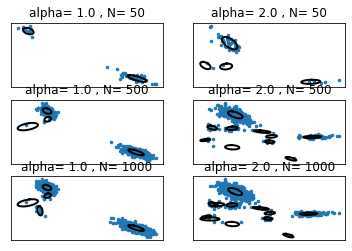

In [12]:
# display results in a single figure
latexify(width_scale_factor=1, fig_width=3, fig_height=3)


bb = jnp.arange(0, 2 * jnp.pi, 0.02)
sample_size = [50, 500, 1000]

n_alphas = len(dp_concentrations)
n_sizes = len(sample_size)

fig, axes = plt.subplots(n_sizes, n_alphas)

for i in range(n_alphas):
    cluster_mean = cluster_means[i]
    cluster_cov = cluster_covs[i]
    sample = samples[i]
    for j in range(n_sizes):
        s = sample_size[j]
        # plotting samples
        # fig, ax = plt.subplots()
        ax = axes[j, i]
        ax.set_xticks([])
        ax.set_yticks([])
        ttl = f"alpha={dp_concentrations[i]: 0.1f} , N={sample_size[j]: 2d}"
        ax.set_title(ttl)
        fname = "dp_mixgauss_alpha{:d}_samples{:d}".format(i, j)
        ax.plot(sample[:s, 0], sample[:s, 1], ".", markersize=5)

        # plotting covariance ellipses
        mu_per_cluster, indices = jnp.unique(cluster_mean[:s], return_index=True, axis=0)
        cov_per_cluster = cluster_cov[indices]
        cov_root_per_cluster = jnp.array([sqrtm(cov) for cov in cov_per_cluster])
        for mu, cov_root in zip(mu_per_cluster, cov_root_per_cluster):
            mu = jnp.atleast_2d(mu).T
            circ = mu.dot(jnp.ones((1, len(bb)))) + cov_root.dot(jnp.vstack([jnp.sin(bb), jnp.cos(bb)]))
            ax.plot(circ[0, :], circ[1, :], linewidth=2, color="k")

pml.savefig("dp_mixgauss_samples")
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")
/opt/anaconda3/lib/python3.8/site-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")
/opt/anaconda3/lib/python3.8/site-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")
/opt/anaconda3/lib/python3.8/site-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


dp_mixgauss_alpha0_samples0
dp_mixgauss_alpha0_samples1
dp_mixgauss_alpha0_samples2
dp_mixgauss_alpha1_samples0


/opt/anaconda3/lib/python3.8/site-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")
/opt/anaconda3/lib/python3.8/site-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


dp_mixgauss_alpha1_samples1
dp_mixgauss_alpha1_samples2


/opt/anaconda3/lib/python3.8/site-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


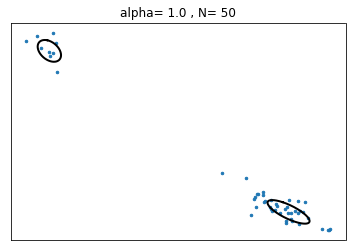

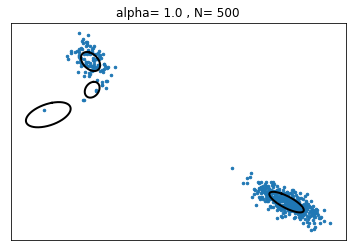

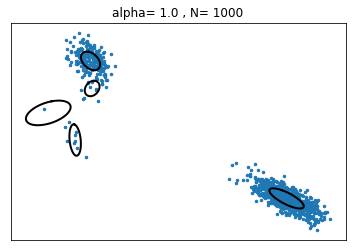

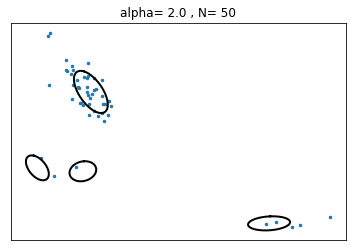

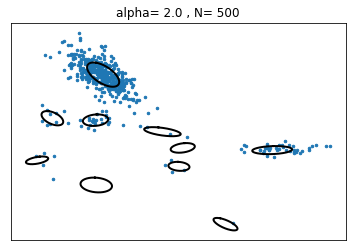

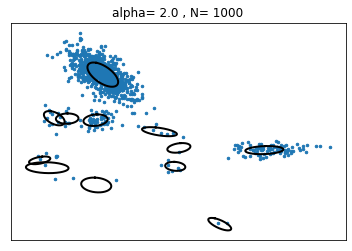

In [13]:
# display results in separate figures
latexify(width_scale_factor=1, fig_width=1.5, fig_height=1.5)

bb = jnp.arange(0, 2 * jnp.pi, 0.02)
sample_size = [50, 500, 1000]

n_alphas = len(dp_concentrations)
n_sizes = len(sample_size)

for i in range(n_alphas):
    cluster_mean = cluster_means[i]
    cluster_cov = cluster_covs[i]
    sample = samples[i]
    for j in range(n_sizes):
        s = sample_size[j]
        # plotting samples
        fig, ax = plt.subplots()
        ax.set_xticks([])
        ax.set_yticks([])
        ttl = f"alpha={dp_concentrations[i]: 0.1f} , N={sample_size[j]: 2d}"
        ax.set_title(ttl)
        fname = "dp_mixgauss_alpha{:d}_samples{:d}".format(i, j)
        print(fname)
        ax.plot(sample[:s, 0], sample[:s, 1], ".", markersize=5)

        # plotting covariance ellipses
        mu_per_cluster, indices = jnp.unique(cluster_mean[:s], return_index=True, axis=0)
        cov_per_cluster = cluster_cov[indices]
        cov_root_per_cluster = jnp.array([sqrtm(cov) for cov in cov_per_cluster])
        for mu, cov_root in zip(mu_per_cluster, cov_root_per_cluster):
            mu = jnp.atleast_2d(mu).T
            circ = mu.dot(jnp.ones((1, len(bb)))) + cov_root.dot(jnp.vstack([jnp.sin(bb), jnp.cos(bb)]))
            ax.plot(circ[0, :], circ[1, :], linewidth=2, color="k")

        pml.savefig(fname)
plt.show()